In [1]:
import numpy as np
from scipy.stats import norm




N = norm.cdf

def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)

def BS_PUT(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)    
    
    
def merton_jump_call(S, K, T, r, sigma, m , v, lam):
    p = 0


    for k in range(5):
        r_k = r - lam*(m-1) + (k*np.log(m) ) / T
        sigma_k = np.sqrt( sigma**2 + (k* v** 2) / T)
        
        k_fact = np.math.factorial(k)
        p += (np.exp(-m*lam*T) * (m*lam*T)**k / (k_fact))  * BS_CALL(S, K, T, r_k, sigma_k)
    
    return p 

def merton_jump_put(S, K, T, r, sigma, m , v, lam):
    p = 0 # price of option
    for k in range(40):
        r_k = r - lam*(m-1) + (k*np.log(m) ) / T
        sigma_k = np.sqrt( sigma**2 + (k* v** 2) / T)
        k_fact = np.math.factorial(k) # 
        p += (np.exp(-m*lam*T) * (m*lam*T)**k / (k_fact)) \
                    * BS_PUT(S, K, T, r_k, sigma_k)
    return p 

ModuleNotFoundError: No module named 'numpy'

In [2]:
import math

In [8]:
from math import log


2.302585092994046

In [2]:
S = 100
K = 100
T = 1
r = 0.2
sigma = 0.1
m = 1 # meean of jump size
v = 0.1 # standard deviation of jump
lam = 1 # intensity of jump i.e. number of jumps per annum
sigma = 0.8 # annaul standard deviation , for weiner process

call = merton_jump_call(S, K, T, r, sigma, m , v, lam)
put = merton_jump_put(S, K, T, r, sigma, m , v, lam)

In [3]:
# buying a call and put at same execution price
call*1 + put*1

58.44984893164069

In [4]:
# starting capital = $1000
# ETH/USD = 100
# x * y = k 
# value of x == value of y
# i.e. you must deposit 1 to 1 value of tokens in pool

In [5]:
ETH = 5
USD = 500

k = ETH * USD
k

2500

In [6]:
# ETH_USD = 100
price = 100

In [7]:
ETH = (k/price)**0.5
USD = (k*price)**0.5

print("Number of ETH deposited to pool:", ETH)
print("Number of USD deposited to pool:", USD)

Number of ETH deposited to pool: 5.0
Number of USD deposited to pool: 500.0


In [8]:
# ETH price goes up to 200USD from 100USD
price = 200

# new balance of tokens 
ETH = (k/price)**0.5
USD = (k*price)**0.5

print("Number of ETH recieved on withdrawl from pool:", ETH)
print("Number of USD recieved on withdrawl from pool:", USD)

Number of ETH recieved on withdrawl from pool: 3.5355339059327378
Number of USD recieved on withdrawl from pool: 707.1067811865476


In [9]:
# User decides to withdraw
# new value of portfolio in USD

value_lp = ETH*price + USD
print("value of portfolio if user decided to deposit liquidity without hedge:", value_lp)

value of portfolio if user decided to deposit liquidity without hedge: 1414.213562373095


In [10]:
hodl = 500 + 5*price
print("value of portfolio if user decided to hodl:", hodl)

value of portfolio if user decided to hodl: 1500


In [11]:
# loss of 5.7%
print("loss:", 1 - value_lp/hodl)

loss: 0.057190958417936644


In [12]:
# now let's say the user decides to buy options in addition to depositing to AMM DEX

# cost of call and put
# 5 options 
options = call*5 + put*5
print("price of call and put:", options)

price of call and put: 292.24924465820345


In [13]:
# total portfolio value of 200
# price is 100

USD = (1000 - options) / 2
ETH = (1000 - options) / 2 / 100

k = ETH * USD

print(USD)
print(ETH)

353.8753776708983
3.5387537767089827


In [14]:
ETH = (k/price)**0.5
USD = (k*price)**0.5

print(ETH)
print(USD)

2.5022767924604272
500.45535849208545


In [15]:
# impermanent loss 
il = ETH*price + USD
il

1000.9107169841709

In [16]:
# impermanent loss plus execution of call option
il = il - K*5
il = il + 5*price
print("value of portfolio after withdrawing liquidity and executing options", il)

value of portfolio after withdrawing liquidity and executing options 1500.910716984171


In [17]:
def hodl(value0,price0,price1):
    tokenA = value0/2
    tokenB = value0/2/price0
    
    value1 = tokenA + tokenB * price1
    return value1

In [18]:
hodl(1000,100,200)

1500.0

In [19]:
def AMM(value0,price0,price1):
    tokenA = value0/2
    tokenB = value0/2/price0

    k = tokenA * tokenB
    
    tokenA = (k*price1)**0.5
    tokenB = (k/price1)**0.5
    
    value1 = tokenA + tokenB * price1
    return value1

In [20]:
AMM(1000,100,200)

1414.213562373095

In [21]:
"""
## @params

value0 = value of porfolio at t0
price0 = price of tokenB in tokenA at t0
price1 = price of tokenB in tokenA at t1
factor = amount of tokenB options, 0 means no options, 1 means tokenB_options = value0/2/price0 

"""

'\n## @params\n\nvalue0 = value of porfolio at t0\nprice0 = price of tokenB in tokenA at t0\nprice1 = price of tokenB in tokenA at t1\nfactor = amount of tokenB options, 0 means no options, 1 means tokenB_options = value0/2/price0 \n\n'

In [22]:
def hedge(value0,price0,price1,factor):
    call = merton_jump_call(price0, price0, T, r, sigma, m , v, lam)
    put = merton_jump_put(price0, price0, T, r, sigma, m , v, lam)
    
    # amount tokenB = number of options
    # this can be changed for different hedging strategies
    tokenA = value0/2
    tokenB_options = value0/2/price0 * factor
    
    # subtracting straddle cost
    straddle = call*tokenB_options + put*tokenB_options
    value0 -= straddle
    
    # amount of tokenA and tokenB after purchase of straddle
    tokenA = value0/2
    tokenB = value0/2/price0
    
    k = tokenA * tokenB

    tokenA = (k*price1)**0.5
    tokenB = (k/price1)**0.5
    
    value1 = tokenA + tokenB * price1
    
    value1 -= price0 * tokenB_options
    value1 += price1 * tokenB_options
    return value1
    

In [23]:
hedge(1000,100,200,1)

1500.910716984171

In [24]:
# df

In [25]:
a = []
b = []
c = []

d = []
e = []
g = []

index = []


price = 1
for i in range(500):
    
    value1 = hodl(1000,100,price)
    value2 = AMM(1000,100,price)
    value3 = hedge(1000,100,price,1)
    
    value4 = hedge(1000,100,price,0.25)
    value5 = hedge(1000,100,price,0.5)
    value6 = hedge(1000,100,price,0.75)
       
    a.append(value1)
    b.append(value2)
    c.append(value3)
    
    d.append(value4)
    e.append(value5)
    g.append(value6)
    
    index.append(i)
    
    price += 1   

In [26]:
import pandas as pd

df = pd.DataFrame()
df["hodl"] = pd.DataFrame(a)
df["1"] = pd.DataFrame(b)
df["2"] = pd.DataFrame(c)
df["3"] = pd.DataFrame(d)
df["4"] = pd.DataFrame(e)
df["5"] = pd.DataFrame(g)
#df["3"] = pd.DataFrame(index)


df["AMM"] = df["1"] / df["hodl"]
df["hedge"] = df["2"] / df["hodl"]

df["hedge 0.25"] = df["3"] / df["hodl"]
df["hedge 0.5"] = df["5"] / df["hodl"]
df["hedge 0.75"] = df["5"] / df["hodl"]


df = df.drop('hodl', 1)
df = df.drop('1', 1)
df = df.drop('2', 1)
df = df.drop('3', 1)
df = df.drop('4', 1)
df = df.drop('5', 1)

df

/tmp/ipykernel_40405/2325220366.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('hodl', 1)
/tmp/ipykernel_40405/2325220366.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('1', 1)
/tmp/ipykernel_40405/2325220366.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('2', 1)
/tmp/ipykernel_40405/2325220366.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('3', 1)
/tmp/ipykernel_40405/2325220366.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('4', 1)
/tmp/ipykernel_40405/232522

,AMM,hedge,hedge 0.25,hedge 0.5,hedge 0.75
0,0.198020,-0.840049,-0.061497,-0.580532,-0.580532
1,0.277297,-0.764527,0.016841,-0.504071,-0.504071
2,0.336321,-0.703716,0.076311,-0.443707,-0.443707
3,0.384615,-0.650865,0.125745,-0.391995,-0.391995
4,0.425918,-0.603318,0.168609,-0.346009,-0.346009
...,...,...,...,...,...
495,0.747351,1.193368,0.858855,1.081864,1.081864
496,0.746851,1.193576,0.858532,1.081895,1.081895
497,0.746352,1.193783,0.858209,1.081925,1.081925
498,0.745853,1.193988,0.857887,1.081955,1.081955


<AxesSubplot:>

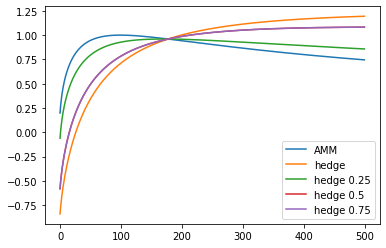

In [27]:
df.plot()

In [28]:
# https://arxiv.org/pdf/2111.09192.pdf